In [1]:
import keras
keras.__version__

Using TensorFlow backend.


'2.3.0'

In [2]:
from keras.datasets import imdb

(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

In [3]:
train_data.shape

(25000,)

In [4]:
test_data.shape

(25000,)

In [5]:
train_labels.shape

(25000,)

In [6]:
test_labels.shape

(25000,)

In [7]:
train_data[0]

[1,
 14,
 22,
 16,
 43,
 530,
 973,
 1622,
 1385,
 65,
 458,
 4468,
 66,
 3941,
 4,
 173,
 36,
 256,
 5,
 25,
 100,
 43,
 838,
 112,
 50,
 670,
 2,
 9,
 35,
 480,
 284,
 5,
 150,
 4,
 172,
 112,
 167,
 2,
 336,
 385,
 39,
 4,
 172,
 4536,
 1111,
 17,
 546,
 38,
 13,
 447,
 4,
 192,
 50,
 16,
 6,
 147,
 2025,
 19,
 14,
 22,
 4,
 1920,
 4613,
 469,
 4,
 22,
 71,
 87,
 12,
 16,
 43,
 530,
 38,
 76,
 15,
 13,
 1247,
 4,
 22,
 17,
 515,
 17,
 12,
 16,
 626,
 18,
 2,
 5,
 62,
 386,
 12,
 8,
 316,
 8,
 106,
 5,
 4,
 2223,
 5244,
 16,
 480,
 66,
 3785,
 33,
 4,
 130,
 12,
 16,
 38,
 619,
 5,
 25,
 124,
 51,
 36,
 135,
 48,
 25,
 1415,
 33,
 6,
 22,
 12,
 215,
 28,
 77,
 52,
 5,
 14,
 407,
 16,
 82,
 2,
 8,
 4,
 107,
 117,
 5952,
 15,
 256,
 4,
 2,
 7,
 3766,
 5,
 723,
 36,
 71,
 43,
 530,
 476,
 26,
 400,
 317,
 46,
 7,
 4,
 2,
 1029,
 13,
 104,
 88,
 4,
 381,
 15,
 297,
 98,
 32,
 2071,
 56,
 26,
 141,
 6,
 194,
 7486,
 18,
 4,
 226,
 22,
 21,
 134,
 476,
 26,
 480,
 5,
 144,
 30,
 5535,
 18,

In [8]:
train_labels[0]

1

In [9]:
max([max(sequence) for sequence in train_data])

9999

Here I am not including the code to convert these numeralsto actual code,as I hve already done in my other notebook

### Preparing the Data

In [10]:
import numpy as np

Here we are one hot encoding our lists to turn them into vectors of 0 and 1s, for example turning [3, 5] into a 10000 dimensional vector that will be all zero except 3 and 5 which will be 1 --- Instructional

it will be 10000 dimensional vector.

In [11]:
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    print("length of sequences : ", len(sequences))
    
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1
    
    print("Results : ", results)
    return results

In [12]:
x_train = vectorize_sequences(train_data)

length of sequences :  25000
Results :  [[0. 1. 1. ... 0. 0. 0.]
 [0. 1. 1. ... 0. 0. 0.]
 [0. 1. 1. ... 0. 0. 0.]
 ...
 [0. 1. 1. ... 0. 0. 0.]
 [0. 1. 1. ... 0. 0. 0.]
 [0. 1. 1. ... 0. 0. 0.]]


In [13]:
x_test = vectorize_sequences(test_data)

length of sequences :  25000
Results :  [[0. 1. 1. ... 0. 0. 0.]
 [0. 1. 1. ... 0. 0. 0.]
 [0. 1. 1. ... 0. 0. 0.]
 ...
 [0. 1. 1. ... 0. 0. 0.]
 [0. 1. 1. ... 0. 0. 0.]
 [0. 1. 1. ... 0. 0. 0.]]


In [18]:
x_train.shape

(25000, 10000)

In [15]:
# testing for python
y_train = np.asarray(train_labels).astype('float32')
y_test =  np.asarray(test_labels).astype('float32')

In [17]:
y_train.shape

(25000,)

In [20]:
from keras import models
from keras import layers

model= models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [21]:
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

W1101 22:59:48.718158 15064 deprecation.py:323] From C:\installs\Anaconda\envs\tf_gpu\lib\site-packages\tensorflow\python\ops\nn_impl.py:180: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [23]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [24]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

W1101 23:06:05.092995 15064 deprecation_wrapper.py:119] From C:\installs\Anaconda\envs\tf_gpu\lib\site-packages\keras\backend\tensorflow_backend.py:422: The name tf.global_variables is deprecated. Please use tf.compat.v1.global_variables instead.



Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 8s 503us/step - loss: 0.5295 - accuracy: 0.7770 - val_loss: 0.3886 - val_accuracy: 0.8684
Epoch 2/20
15000/15000 [==============================] - 3s 203us/step - loss: 0.3065 - accuracy: 0.8993 - val_loss: 0.3061 - val_accuracy: 0.8857
Epoch 3/20
15000/15000 [==============================] - 3s 175us/step - loss: 0.2216 - accuracy: 0.9281 - val_loss: 0.2994 - val_accuracy: 0.8776
Epoch 4/20
15000/15000 [==============================] - 3s 185us/step - loss: 0.1775 - accuracy: 0.9438 - val_loss: 0.3485 - val_accuracy: 0.8572
Epoch 5/20
15000/15000 [==============================] - 3s 179us/step - loss: 0.1442 - accuracy: 0.9547 - val_loss: 0.2918 - val_accuracy: 0.8859
Epoch 6/20
15000/15000 [==============================] - 3s 184us/step - loss: 0.1143 - accuracy: 0.9647 - val_loss: 0.3169 - val_accuracy: 0.8813
Epoch 7/20
15000/15000 [==============================] - 2s 1

In [26]:
history_dict = history.history
history_dict.keys()

dict_keys(['val_loss', 'val_accuracy', 'loss', 'accuracy'])

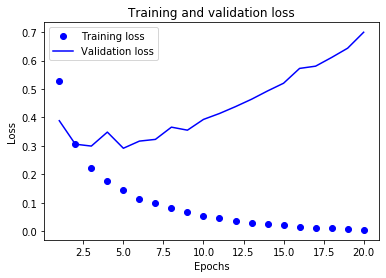

In [29]:
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc)+ 1)

plt.plot(epochs, loss,'bo',label='Training loss')

plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [ ]:
model = model.